In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore") 

In [5]:
miami = pd.read_excel('c:/Users/denis/Desktop/Ironhack/ironhackLabs/Transportation/Users_Monthly.xlsx')

# Data Cleaning

In [169]:
def clean(x): 
    x = x[x['UZA Name'] == 'Miami, FL']
    x = x[x['Agency'] == 'Miami-Dade Transit']
    x = x.drop(['5 digit NTD ID', 'UZA', 'Unnamed: 226'], axis=1)
    x_grouped = x.groupby('Modes').sum()
    x_grouped = x_grouped.T
    x_test = x_grouped.reset_index()
    x_test = x_test.rename(columns={"index": "Time"})
    x_test['Time'] = pd.to_datetime(x_test['Time'], format='%b%y')
    x_test.drop(['Rail'], axis = 1)
    return x_test.head(10)

In [204]:
# clean(miami)

In [6]:
miami = miami[miami['UZA Name'] == 'Miami, FL']
miami = miami[miami['Agency'] == 'Miami-Dade Transit']
miami = miami.drop(['5 digit NTD ID', 'UZA', 'Unnamed: 226'], axis=1)
miami_grouped = miami.groupby('Modes').sum()

In [7]:
miami_grouped.head()

,JAN02,FEB02,MAR02,APR02,MAY02,JUN02,JUL02,AUG02,SEP02,OCT02,NOV02,DEC02,JAN03,FEB03,MAR03,APR03,MAY03,JUN03,JUL03,AUG03,SEP03,OCT03,NOV03,DEC03,JAN04,FEB04,MAR04,APR04,MAY04,JUN04,JUL04,AUG04,SEP04,OCT04,NOV04,DEC04,JAN05,FEB05,MAR05,APR05,MAY05,JUN05,JUL05,AUG05,SEP05,OCT05,NOV05,DEC05,JAN06,FEB06,MAR06,APR06,MAY06,JUN06,JUL06,AUG06,SEP06,OCT06,NOV06,DEC06,JAN07,FEB07,MAR07,APR07,MAY07,JUN07,JUL07,AUG07,SEP07,OCT07,NOV07,DEC07,JAN08,FEB08,MAR08,APR08,MAY08,JUN08,JUL08,AUG08,SEP08,OCT08,NOV08,DEC08,JAN09,FEB09,MAR09,APR09,MAY09,JUN09,JUL09,AUG09,SEP09,OCT09,NOV09,DEC09,JAN10,FEB10,MAR10,APR10,MAY10,JUN10,JUL10,AUG10,SEP10,OCT10,NOV10,DEC10,JAN11,FEB11,MAR11,APR11,MAY11,JUN11,JUL11,AUG11,SEP11,OCT11,NOV11,DEC11,JAN12,FEB12,MAR12,APR12,MAY12,JUN12,JUL12,AUG12,SEP12,OCT12,NOV12,DEC12,JAN13,FEB13,MAR13,APR13,MAY13,JUN13,JUL13,AUG13,SEP13,OCT13,NOV13,DEC13,JAN14,FEB14,MAR14,APR14,MAY14,JUN14,JUL14,AUG14,SEP14,OCT14,NOV14,DEC14,JAN15,FEB15,MAR15,APR15,MAY15,JUN15,JUL15,AUG15,SEP15,OCT15,NOV15,DEC15,JAN16,FEB16,MAR16,APR16,MAY16,JUN16,JUL16,AUG16,SEP16,OCT16,NOV16,DEC16,JAN17,FEB17,MAR17,APR17,MAY17,JUN17,JUL17,AUG17,SEP17,OCT17,NOV17,DEC17,JAN18,FEB18,MAR18,APR18,MAY18,JUN18,JUL18,AUG18,SEP18,OCT18,NOV18,DEC18,JAN19,FEB19,MAR19,APR19,MAY19,JUN19,JUL19,AUG19,SEP19,OCT19,NOV19,DEC19,JAN20
Modes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bus,5512260.00,5212070.00,5584941.00,5485658.00,5526653.00,4868326.00,5318877.00,5456934.00,5268803.00,5833271.00,5214391.00,5230387.00,5395806.00,5710527.00,6003891.00,5476479.00,5570370.00,5212207.00,5560537.00,5431215.00,5549182.00,5989423.00,5487946.00,5517526.00,6117990.00,6040880.00,6708846.00,6766912.00,6371456.00,6384199.00,6658227.00,6587799.00,7025682.00,7415853.00,6711378.00,6850814.00,6703209.00,6458778.00,7189671.00,6738174.00,7135949.00,6145300.00,6257652.00,6524011.00,6689814.00,6289358.00,7072014.00,7155858.00,7233774.00,6720318.00,7680650.00,6972300.00,7188801.00,7073119.00,6615189.00,7096612.00,7063309.00,7450511.00,7012951.00,6922286.00,7225204.00,6780075.00,7650948.00,6934652.00,7223046.00,6723085.00,6714140.00,7194214.00,7209981.00,7601166.00,7119785.00,7044371.00,7122390.00,7040637.00,7347587.00,7253804.00,7449306.00,7149288.00,7526448.00,7122809.00,7490700.00,7167867.00,6522939.00,6608908.00,6563369.00,6349957.00,6839145.00,7212702.00,6294428.00,5884426.00,6040944.00,6069316.00,6105713.00,6151678.00,5669250.00,5827925.00,5728052.00,5709910.00,6435598.00,6165876.00,6117790.00,5952186.00,5913496.00,6034112.00,6139651.00,6528026.00,6263925.00,6042965.00,6335200.00,6257210.00,6995622.00,6581303.00,6604376.00,6366584.00,6151452.00,6519037.00,6671320.00,6658055.00,6713595.00,6617842.00,6769561.00,6649619.00,7155078.00,6610528.00,6717198.00,6279352.00,6345294.00,6537294.00,6447207.00,7179884.00,6792950.00,6546516.00,6798921.00,6580295.00,6986983.00,6869106.00,6741668.00,6177871.00,6407429.00,6753419.00,6649205.00,7299170.00,6556720.00,6551544.00,6653350.00,6451457.00,6810455.00,6742944.00,6577085.00,6017396.00,6284522.00,6425908.00,6540101.00,6912922.00,6118467.00,6461736.00,6470575.00,5904204.00,6802031.00,6273258.00,6044299.00,5747574.00,5891889.00,5873269.00,5908391.00,6238588.00,5647039.00,5805733.00,5580707.00,5633914.00,5903862.00,5698145.00,5564241.00,5310256.00,5132849.00,5342292.00,5325486.00,5086790.00,5348172.00,5356637.00,5250895.00,5077884.00,5473080.00,5062054.00,5270187.00,4756582.00,4702824.00,4961922.00,3669995.00,4862999.00,4665625.00,4517054.00,4488710.00,4385530.00,4727366.00,4548340.00,4471727.00,4193031.00,4263154.00,4522253.00,4222242.00,4760815.00,4430104.00,4255258.00,4383467.00,4172464.00,4459521.00,4489953.00,4531181.00,4003475.00,4282876.00,4298350.00,4152847.00,4711873.00,4384054.00,4309412.00,4512320.00
Rail,1551952.00,1494895.00,1613905.00,1583007.00,1587454.00,1453326.00,1603810.00,1

In [8]:
miami_grouped = miami_grouped.T
miami_test = miami_grouped.reset_index()
miami_test = miami_test.rename(columns={"index": "Time"})

In [9]:
# miami_test = miami_test.rename(columns={"index": "Time"})
miami_test['Time'] = pd.to_datetime(miami_test['Time'], format='%b%y')
miami_test = miami_test.set_index(['Time'], drop=True)

In [10]:
miami_test = miami_test.drop(['Rail'], axis=1)

In [11]:
miami_test.head()

Modes,Bus
Time,
2002-01-01,5512260.00
2002-02-01,5212070.00
2002-03-01,5584941.00
2002-04-01,5485658.00
2002-05-01,5526653.00


In [10]:
miami_test.shape

(217, 1)

In [12]:
miami_test['Bus'] = miami_test['Bus'].astype(float)
miami_test['Bus'].dtype

dtype('float64')

# Data Visualization 

In [18]:
import seaborn as sns
ax = sns.lineplot(x="Time", y="Bus",data=miami_test)

ValueError: Could not interpret input 'Time'

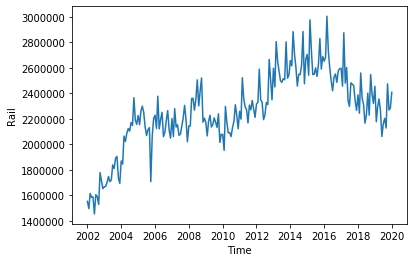

In [142]:
ax = sns.lineplot(x="Time", y="Rail",data=miami_test)

Note: Hurricane Irma occured Sept 2017, Wilma October 2005, and Katrina August 2005

In [17]:
oneyear = miami_test[miami_test.index.dt.year == 2014]

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

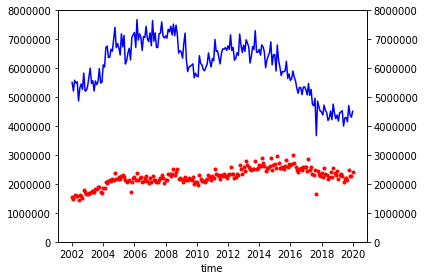

In [29]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
t = miami_test['Time']
y1 = miami_test['Bus']
ax1.plot(t, y1, 'b-')
ax1.set_xlabel('time')

ax2 = ax1.twinx()
y2 = miami_test['Rail']
ax2.plot(t, y2, 'r.')
a,b = 0,8000000
ax1.set_ylim(a,b)
ax2.set_ylim(a,b)

fig.tight_layout()
plt.show()

# Removing/Averaging Out Hurricane Data

In [74]:
def betweenavg(x):
# x= '2017-09-01'
    xloc = miami_test[miami_test['Time']==x].index.item()
    z = miami_test[miami_test['Time']==x].index.item() + 1
    y = miami_test[miami_test['Time']==x].index.item()-1
    a = (miami_test.iloc[z, 1:3] + miami_test.iloc[y, 1:3])/2
    miami_test.loc[xloc] = a
    print(miami_test.loc[xloc])

In [76]:
# betweenavg('2017-09-01')

In [13]:
miami_test.loc['2017-09-01'] = 4912460

In [299]:
miami_test.loc['2017-09-01']

Modes
Bus    4912460
Name: 2017-09-01 00:00:00, dtype: object

In [139]:
miami_test.loc[miami_test.Time=='2017-09-01' ,'Rail'] = a[1]

In [126]:
# miami_test.loc[xloc] = a
miami_test.loc[xloc][1] = a[0]

C:\Users\denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
x= '2017-09-01'
xloc = miami_test[miami_test['Time']==x].index.item()
z = xloc +1
y = xloc -1
a = (miami_test.iloc[z, 1:3] + miami_test.iloc[y, 1:3])/2
# miami_test.loc[xloc] = a
# print(miami_test.loc[xloc])

C:\Users\denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  


In [13]:
oneyear = miami_test[miami_test['Time'].dt.year == 2017]

KeyError: 'Time'

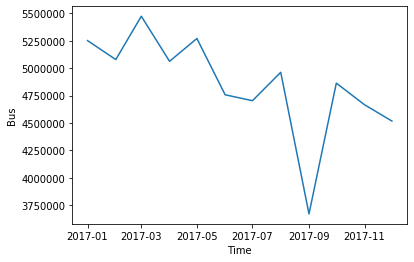

In [100]:
ax = sns.lineplot(x="Time", y="Bus",data=oneyear)

In [19]:
miami_test.describe()

Modes,Bus
count,217.00
mean,6082700.25
std,906482.48
min,4003475.00
25%,5476479.00
50%,6273258.00
75%,6741668.00
max,7680650.00


# Dump -- Maybe for later

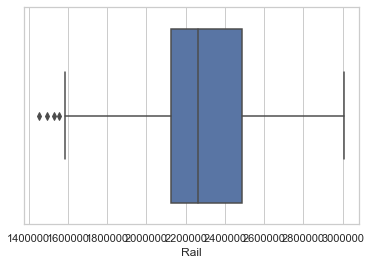

In [105]:
sns.set(style="whitegrid")
# Bus = sns.load_dataset("miami_test")
ax = sns.boxplot(x=miami_test["Rail"])

In [20]:
# year = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
# month = ['JAN', 'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

# for i in year:
#     for x in miami_test['Time']:
#         miami_test['Time'] = miami_test['Time'].str.replace(i,'20'+i)

# year = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
# for i in year:
#     print('20'+i)

In [236]:
# miami_test = miami_test.set_index(['Time'], drop=True)

In [97]:
# miami_test['Time'] = pd.to_datetime(miami_test['Time'], format='%b%y')

In [110]:
# miami_test.to_excel(r'c:/Users/denis/Desktop/Ironhack/ironhackLabs/Transportation/Miami_Test.xlsx', index = False)

In [79]:
# ax = sns.lineplot(x="Time", y="Bus",data=oneyear)

# Attempt 1: Stationarity via Log Transformation

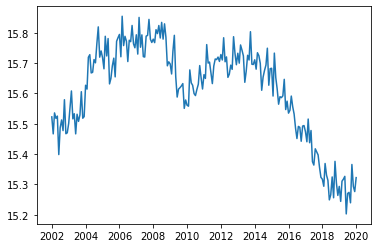

In [305]:
miami_test_logScale = np.log(miami_test)
plt.plot(miami_test_logScale)

In [306]:
movingavg = miami_test_logScale.rolling(window=12).mean()
movingstd = miami_test_logScale.rolling(window=12).std()

In [307]:
submovingavg = miami_test_logScale - movingavg
submovingavg.head()

submovingavg.dropna(inplace = True)

In [308]:
submovingavg.head(12)

Modes,Bus
Time,
2002-12-01,-0.03
2003-01-01,0.01
2003-02-01,0.06
2003-03-01,0.10
2003-04-01,0.01
2003-05-01,0.02
2003-06-01,-0.05
2003-07-01,0.01
2003-08-01,-0.01


In [284]:
def test_stationarity(timeseries):

#Determing rolling stats
    movingAvg= timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

#plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAvg, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='Black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

#perform dickey-fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Bus'], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statisitc', 'p-value', '#Lags USed', '# of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

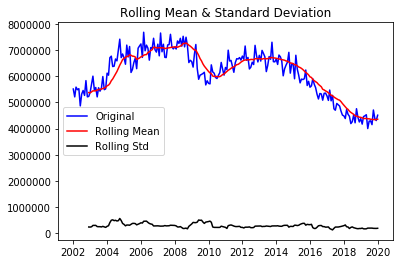

Results of Dickey-Fuller Test:
Test Statisitc            -1.11
p-value                    0.71
#Lags USed                12.00
# of Observations Used   204.00
Critical Value (1%)       -3.46
Critical Value (5%)       -2.88
Critical Value (10%)      -2.57
dtype: float64


In [298]:
test_stationarity(miami_test)

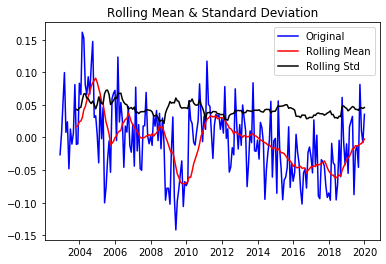

Results of Dickey-Fuller Test:
Test Statisitc            -2.58
p-value                    0.10
#Lags USed                12.00
# of Observations Used   193.00
Critical Value (1%)       -3.46
Critical Value (5%)       -2.88
Critical Value (10%)      -2.57
dtype: float64


In [309]:
test_stationarity(submovingavg)

In [310]:
weightedAvg = miami_test_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
dfweightedAvg = miami_test_logScale - weightedAvg 

# Attempt 2: Stationarity via Differencing 

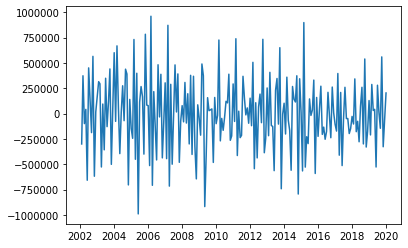

In [315]:
from matplotlib import pyplot
diff = miami_test.diff()
pyplot.plot(diff)
pyplot.show()

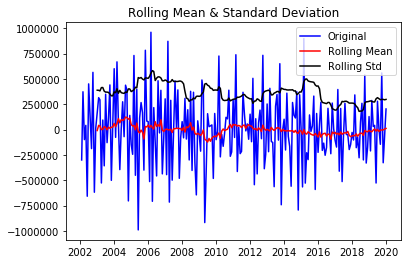

Results of Dickey-Fuller Test:
Test Statisitc            -3.16
p-value                    0.02
#Lags USed                15.00
# of Observations Used   200.00
Critical Value (1%)       -3.46
Critical Value (5%)       -2.88
Critical Value (10%)      -2.57
dtype: float64


In [318]:
diff.dropna(inplace = True)
test_stationarity(diff)

In [316]:
diff

Modes,Bus
Time,
2002-01-01,nan
2002-02-01,-300190.00
2002-03-01,372871.00
2002-04-01,-99283.00
2002-05-01,40995.00
2002-06-01,-658327.00
2002-07-01,450551.00
2002-08-01,138057.00
2002-09-01,-188131.00


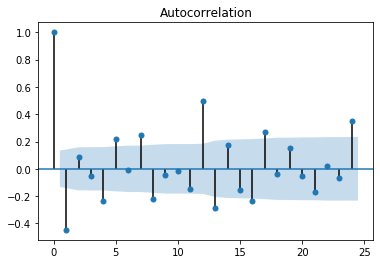

In [319]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff)
pyplot.show()

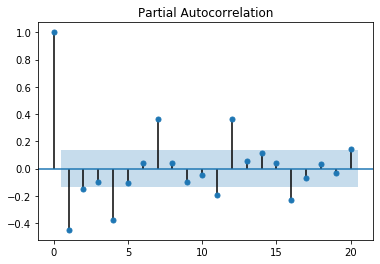

In [332]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff, lags=20)
pyplot.show()

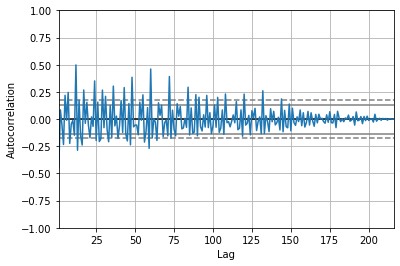

In [334]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(diff)
pyplot.show()

# Attempt 3: Stationarity via Second Differencing

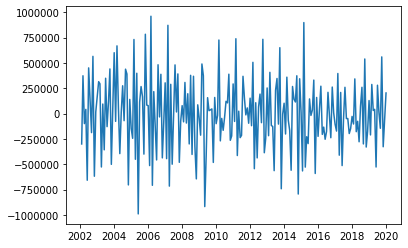

In [329]:
diff2 = miami_test.diff(periods=2)
pyplot.plot(diff)
pyplot.show()

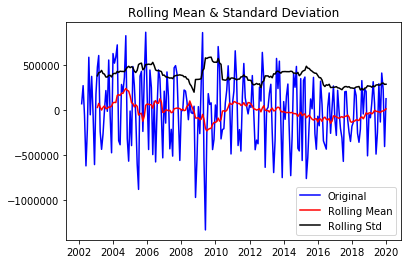

Results of Dickey-Fuller Test:
Test Statisitc            -3.10
p-value                    0.03
#Lags USed                14.00
# of Observations Used   200.00
Critical Value (1%)       -3.46
Critical Value (5%)       -2.88
Critical Value (10%)      -2.57
dtype: float64


In [330]:
diff2.dropna(inplace = True)
test_stationarity(diff2)

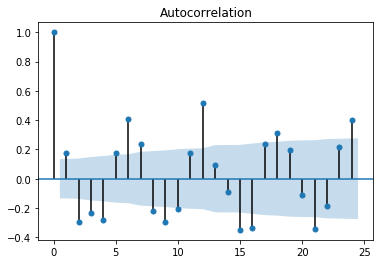

In [331]:
plot_acf(diff2)
pyplot.show()

# ARIMA models

                             ARIMA Model Results                              
Dep. Variable:                  D.Bus   No. Observations:                  216
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3037.080
Method:                       css-mle   S.D. of innovations         308868.654
Date:                Mon, 16 Mar 2020   AIC                           6086.161
Time:                        11:53:41   BIC                           6106.412
Sample:                    02-01-2002   HQIC                          6094.343
                         - 01-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4629.3519   8589.546     -0.539      0.590   -2.15e+04    1.22e+04
ar.L1.D.Bus    -0.1069      0.335     -0.319      0.750      -0.764       0.550
ar.L2.D.Bus     0.0967      0.093      1.037    

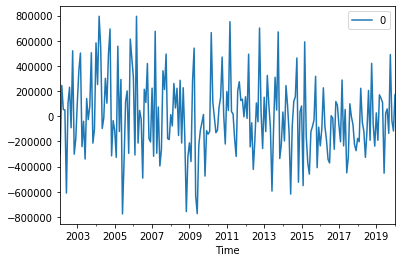

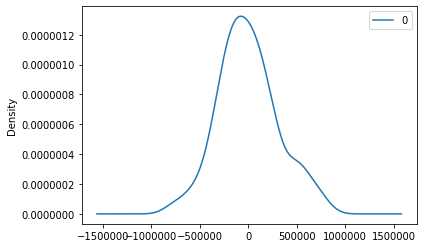

               0
count     216.00
mean     -700.43
std    309796.37
min   -776410.01
25%   -203422.80
50%    -24973.87
75%    177816.28
max    794124.17


In [338]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(miami_test, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.Bus   No. Observations:                  216
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3037.607
Method:                       css-mle   S.D. of innovations         309613.876
Date:                Mon, 16 Mar 2020   AIC                           6083.214
Time:                        11:59:11   BIC                           6096.715
Sample:                    02-01-2002   HQIC                          6088.668
                         - 01-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4629.3519   8648.381     -0.535      0.593   -2.16e+04    1.23e+04
ar.L1.D.Bus     0.0251      0.105      0.238      0.812      -0.182       0.232
ma.L1.D.Bus    -0.6026      0.080     -7.562    

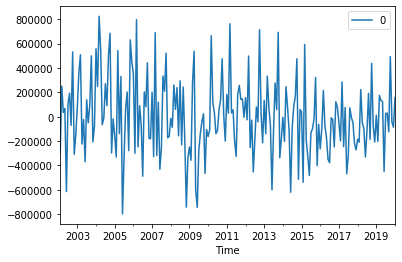

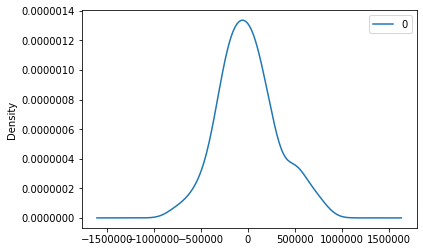

               0
count     216.00
mean     -668.69
std    310547.32
min   -797239.43
25%   -200412.57
50%    -23010.72
75%    176554.40
max    823886.52


In [339]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(miami_test, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D2.Bus   No. Observations:                  215
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -3030.903
Method:                       css-mle   S.D. of innovations         315779.780
Date:                Mon, 16 Mar 2020   AIC                           6071.807
Time:                        15:49:10   BIC                           6088.660
Sample:                    03-01-2002   HQIC                          6078.616
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -301.7088    208.548     -1.447      0.149    -710.456     107.039
ar.L1.D2.Bus    -0.5163      0.067     -7.650      0.000      -0.649      -0.384
ar.L2.D2.Bus    -0.1474      0.067     -2.18

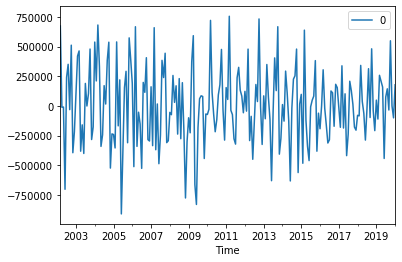

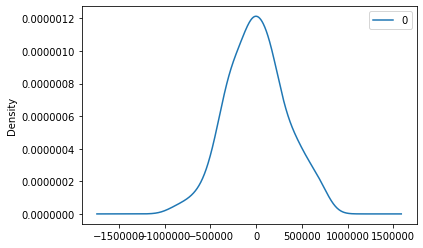

               0
count     215.00
mean     3544.63
std    323031.16
min   -909623.42
25%   -221801.62
50%     -9355.76
75%    197067.06
max    755681.27


In [346]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(miami_test, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

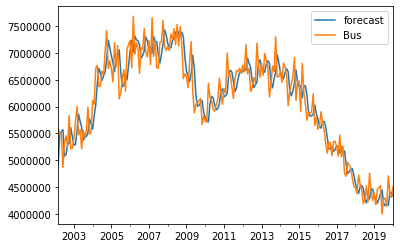

In [347]:
model_fit.plot_predict(dynamic=False)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                 D2.Bus   No. Observations:                  215
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -3030.903
Method:                       css-mle   S.D. of innovations         315779.780
Date:                Mon, 16 Mar 2020   AIC                           6071.807
Time:                        20:31:55   BIC                           6088.660
Sample:                    03-01-2002   HQIC                          6078.616
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -301.7088    208.548     -1.447      0.149    -710.456     107.039
ar.L1.D2.Bus    -0.5163      0.067     -7.650      0.000      -0.649      -0.384
ar.L2.D2.Bus    -0.1474      0.067     -2.18

NameError: name 'pyplot' is not defined

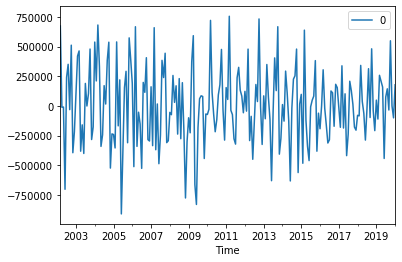

In [24]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(miami_test, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Training the model

In [25]:
from statsmodels.tsa.stattools import acf

# Create Training and Test at 75% // 25% 
train = miami_test[:163]
test = miami_test[163:]

In [377]:
# miami_test2 =list(test)
# for i in range(10):
#     miami_test2.append(0)

In [21]:
import itertools
p=d=q=range(0,13)
pdq = list(itertools.product(p,d,q))

In [25]:
new = []
for param in pdq:
    try:
        model = ARIMA(train, order=param)
        fitted = model.fit()
        fc, se, conf = fitted.forecast(54, alpha=0.05)
        mape = np.mean(np.abs(fc - test.values)/np.abs(test.values)) 
        new.append({param : mape})
    except:
        continue
        

In [53]:
new

{(0, 0, 0): 0.34084622506522444,
 (0, 0, 1): 0.34038409451064816,
 (0, 0, 2): 0.3399285726463891,
 (0, 0, 3): 0.3381188052114343,
 (0, 0, 4): 0.3375702919790597,
 (0, 0, 5): 0.33756798592042503,
 (0, 0, 6): 0.33584452646874285,
 (0, 0, 7): 0.33158809249983595,
 (0, 0, 8): 0.3326803963903354,
 (0, 0, 9): 0.3326330474861606,
 (0, 0, 10): 0.33263130366842897,
 (0, 0, 11): 0.3322896238250654,
 (0, 0, 12): 0.3272735863673556,
 (0, 1, 0): 0.2347849557719355,
 (0, 1, 1): 0.2542330051011391,
 (0, 1, 2): 0.2569418022949584,
 (0, 1, 3): 0.2683201557659688,
 (0, 1, 9): 0.2453117176493581,
 (0, 2, 0): 1.3347996581991057,
 (0, 2, 1): 0.13801135089924585,
 (1, 0, 0): 0.3321763089689939,
 (1, 0, 1): 0.2914502824268586,
 (1, 0, 2): 0.29125431807977276,
 (1, 0, 3): 0.2946706289260462,
 (1, 0, 4): 0.29247514286974763,
 (1, 0, 5): 0.2925080842237639,
 (1, 0, 6): 0.2940582984779969,
 (1, 0, 7): 0.307384280575018,
 (1, 0, 8): 0.29729532524372926,
 (1, 0, 9): 0.2991280267722174,
 (1, 0, 10): 0.3013809478265

In [55]:
# new = {k:v for element in new for k,v in element.items()}

In [28]:
temp = min(new.values()) 
res = [key for key in new if new[key] == temp] 
  
# printing result  
print("Keys with minimum values are : " + str(res))

Keys with minimum values are : [(12, 2, 7)]


In [57]:
{k: v for k, v in sorted(new.items(), key=lambda item: item[1])}

{(12, 2, 7): 0.1182097179304184,
 (2, 2, 0): 0.13154782424453615,
 (2, 2, 6): 0.13592367403563888,
 (0, 2, 1): 0.13801135089924585,
 (8, 2, 2): 0.13909205711479328,
 (9, 2, 2): 0.1392075780730125,
 (10, 2, 2): 0.13954079217614263,
 (4, 2, 0): 0.13970212285058162,
 (3, 2, 1): 0.13984631075798037,
 (1, 2, 11): 0.13988998755606152,
 (1, 2, 10): 0.14012854055797944,
 (2, 2, 1): 0.14052541861414627,
 (1, 2, 7): 0.14079742935942519,
 (1, 2, 1): 0.14110688821317038,
 (6, 2, 3): 0.14221014795688858,
 (6, 2, 4): 0.14228356795514924,
 (2, 2, 5): 0.1435590666129993,
 (4, 2, 1): 0.14405231236173802,
 (5, 2, 2): 0.1441822816783738,
 (5, 2, 1): 0.14418772568756505,
 (4, 2, 2): 0.14437003376748925,
 (2, 2, 7): 0.14831016670274125,
 (1, 2, 5): 0.15089214418768573,
 (1, 2, 3): 0.15251618295450298,
 (5, 2, 0): 0.15882461503773804,
 (3, 2, 5): 0.17924938658480022,
 (4, 2, 3): 0.19504554558729448,
 (11, 2, 1): 0.20214244896129624,
 (11, 2, 2): 0.20487097884531408,
 (5, 2, 3): 0.2076424833917845,
 (3, 0, 9

In [29]:
model = ARIMA(train, order=(12,2, 7))  
fitted = model.fit()  

In [61]:
train

Modes,Bus
Time,
2002-01-01,5512260.00
2002-02-01,5212070.00
2002-03-01,5584941.00
2002-04-01,5485658.00
2002-05-01,5526653.00
2002-06-01,4868326.00
2002-07-01,5318877.00
2002-08-01,5456934.00
2002-09-01,5268803.00


In [30]:
fc, se, conf = fitted.forecast(54, alpha=0.05)  # 95% conf

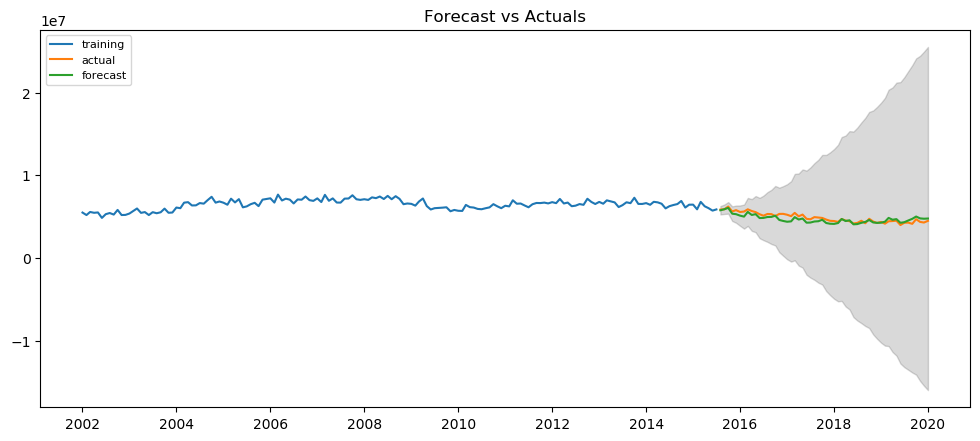

In [31]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [398]:
# predictions = fitted.forecast(64)[0]

In [420]:
# predictions

In [32]:
print(fitted.aic)

4526.673885339678


In [428]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
# ?                    # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.22393591976186852,
 'me': 1001750.409939918,
 'mae': 1023374.2056619431,
 'mpe': 0.22038339721094788,
 'rmse': 1161234.2947661488}

# Trying different models

In [58]:
model = ARIMA(train, order=(2,2, 0))  
fitted = model.fit()  

In [59]:
fc, se, conf = fitted.forecast(54, alpha=0.05)  # 95% conf

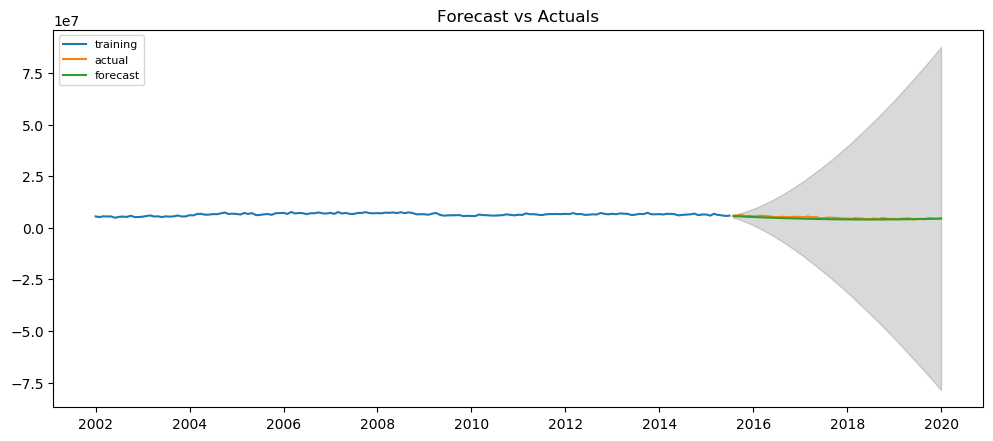

In [60]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [439]:
print(fitted.aic)

4523.965267729865


In [37]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
# ?                    # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.14052541861414627,
 'me': -32162.595663240783,
 'mae': 685471.166582141,
 'mpe': 0.006339131108377342,
 'rmse': 837408.6235800837}

# Trying Decomposition

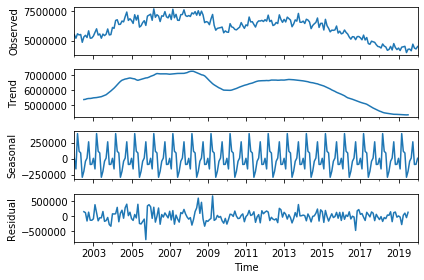

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(miami_test)
result.plot()
pyplot.show()

# Tring SARIMA

In [3]:
# from pyramid.arima import auto_arima
# stepwise_model = auto_arima(miami_test, start_p=1, start_q=1,
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
# print(stepwise_model.aic())

In [17]:
percent_training = 0.75
split_point = round(len(miami_test) * percent_training)
train, test = miami_test[0:split_point], miami_test[split_point:]

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(miami_test, order=(1,1,1), seasonal_order=(1,0,0,12), enforce_stationarity=False, enforce_invertibility=False) 
model_fit = model.fit(disp=False)



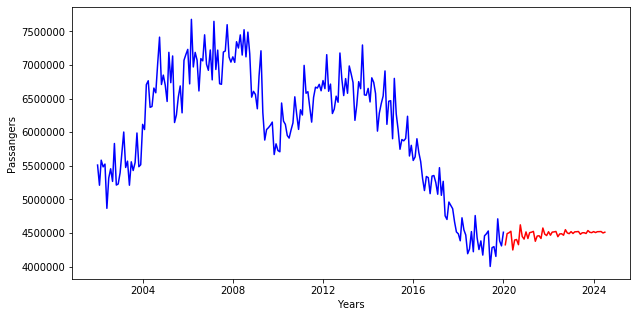

In [22]:
K = len(test)
forecast = model_fit.forecast(K)
# forecast = np.exp(forecast)

plt.figure(figsize=(10,5))
plt.plot(forecast, 'r');
plt.plot(miami_test, 'b');
# plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-test)**2)/len(test)));
plt.xlabel('Years'); 
plt.ylabel('Passangers');
# plt.axvline(x=miami_test(split_point), color='black');

# Himanshu's Sarima

                                 Statespace Model Results                                 
Dep. Variable:                                Bus   No. Observations:                  163
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1911.522
Date:                            Tue, 17 Mar 2020   AIC                           3831.045
Time:                                    20:27:52   BIC                           3842.695
Sample:                                01-01-2002   HQIC                          3835.779
                                     - 07-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5243      0.069     -7.555      0.000      -0.660      -0.388
ar.S.L12      -0.3460      0.123   

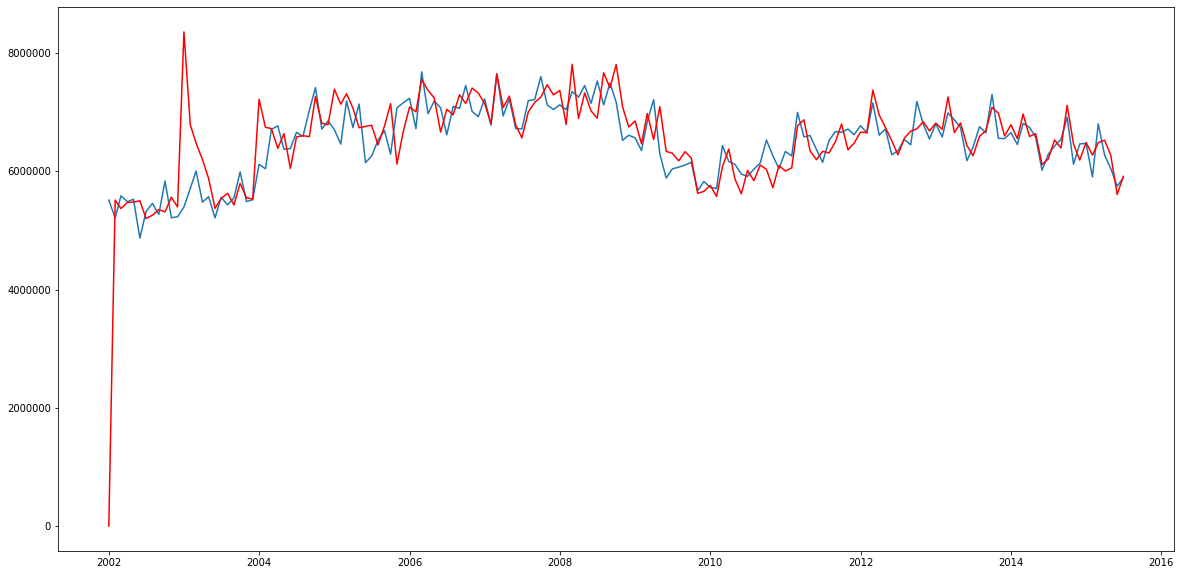

In [43]:
model = SARIMAX(train, order=(0,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
fitted = model.fit()
print(fitted.summary())
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.plot(train)
plt.plot(fitted.fittedvalues, color='red')
plt.show() 

In [29]:
forecast = fitted.predict(start=1, end=int(0.9*(len(miami_test))))
forecast

2002-02-01   5139749.31
2002-03-01   5242681.93
2002-04-01   5366201.55
2002-05-01   5455825.24
2002-06-01   5488719.14
2002-07-01   5261263.03
2002-08-01   5203437.99
2002-09-01   5322923.81
2002-10-01   5329579.13
2002-11-01   5508171.20
2002-12-01   5462729.48
2003-01-01   8236155.10
2003-02-01   6965015.79
2003-03-01   6353856.11
2003-04-01   6076936.57
2003-05-01   5846745.25
2003-06-01   5286834.17
2003-07-01   5501445.38
2003-08-01   5599344.11
2003-09-01   5434111.43
2003-10-01   5784902.96
2003-11-01   5519655.39
2003-12-01   5538850.18
2004-01-01   7145066.12
2004-02-01   6814186.66
2004-03-01   6718365.59
2004-04-01   6293947.74
2004-05-01   6558366.00
2004-06-01   6061577.65
2004-07-01   6539574.66
2004-08-01   6613979.25
2004-09-01   6600176.40
2004-10-01   7248913.39
2004-11-01   6816410.33
2004-12-01   6810518.00
2005-01-01   7230353.05
2005-02-01   7124322.85
2005-03-01   7316461.10
2005-04-01   7013348.33
2005-05-01   6715031.48
2005-06-01   6699002.28
2005-07-01   685

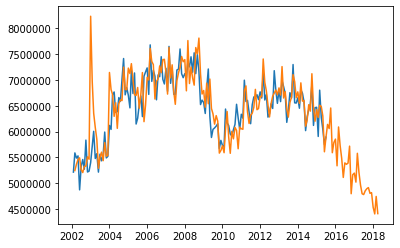

In [34]:
# plot the predictions for validation set
plt.plot(train[1:167], label='Train')
plt.plot(forecast[1:217], label='Prediction')
plt.show()

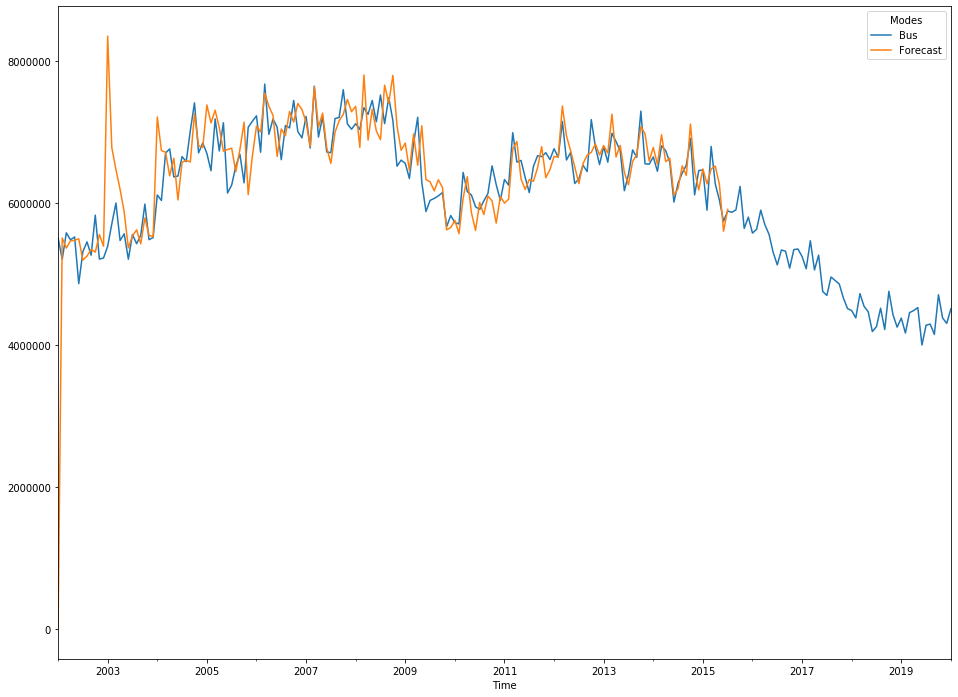

In [59]:
miami_test['Forecast'] = fitted.fittedvalues 
miami_test[['Bus', 'Forecast']].plot(figsize=(16, 12))  
# data['Forecast'] = fitted.forecast(100) 
# data[['Price', 'Forecast']].plot(figsize=(12, 8))

In [53]:
import datetime
start = datetime.datetime.strptime("2020-02-01", "%Y-%m-%d")
date_list = pd.date_range('2020-02-01', freq='1M', periods=12)
future = pd.DataFrame(index=date_list, columns= miami_test.columns)
data = pd.concat([miami_test, future])

Modes,Bus,Forecast
2002-01-01,5512260.00,0.00
2002-02-01,5212070.00,5512260.00
2002-03-01,5584941.00,5369442.26
2002-04-01,5485658.00,5471968.03
2002-05-01,5526653.00,5478481.19
2002-06-01,4868326.00,5501399.47
2002-07-01,5318877.00,5200207.56
2002-08-01,5456934.00,5256665.90
2002-09-01,5268803.00,5351945.73
2002-10-01,5833271.00,5312389.63


In [67]:
# start = datetime.datetime.strptime("2020-02-01", "%Y-%m-%d")
# date_list = [start + relativedelta(months=x) for x in range(0,12)]
# future = pd.DataFrame(index=date_list, columns= miami_test.columns)
# df = pd.concat([miami_test, future])

# df['forecast'] = results.predict(start = 217, end = 229, dynamic= True)  
# df[['Bus', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 
# # data['forecast'] = fitted.predict(start = 229, end = 250, dynamic= True)  
# # data[['Bus', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 

In [70]:
pred_uc = fitted.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

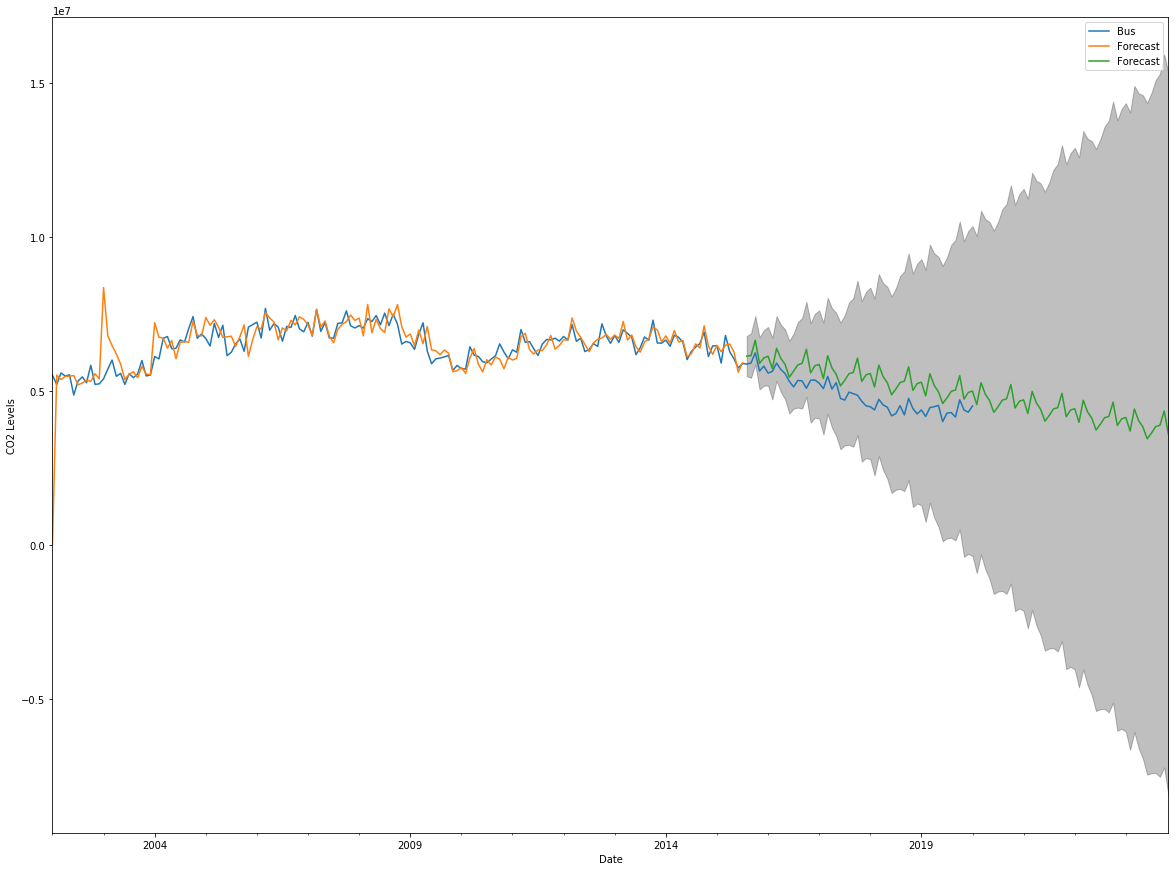

In [71]:
ax = miami_test.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

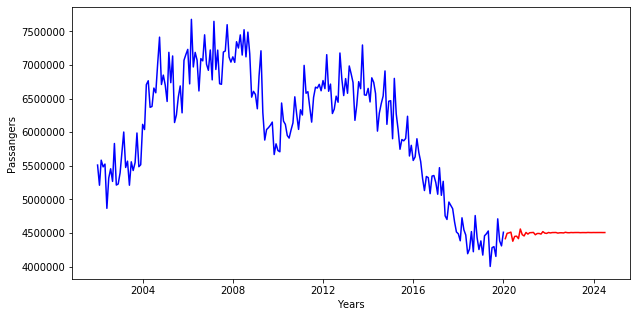

In [24]:
K = len(test)
forecast = model_fit.forecast(K)
# forecast = np.exp(forecast)

plt.figure(figsize=(10,5))
plt.plot(forecast, 'r');
plt.plot(miami_test, 'b');
# plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-test)**2)/len(test)));
plt.xlabel('Years'); 
plt.ylabel('Passangers');
# plt.axvline(x=miami_test(split_point), color='black');

# New models-- SARIMA

In [40]:
import itertools
#set parameter range
p = range(0,3)
q = range(0,3)
d = range(1,2)
s = range(12,13)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 13.121413
         Iterations: 2
         Function evaluations: 38
SARIMA(0, 1, 0),(0, 1, 0, 12) - AIC:4279.580516086926
Optimization terminated successfully.
         Current function value: 13.045883
         Iterations: 2
         Function evaluations: 51
SARIMA(0, 1, 0),(0, 1, 1, 12) - AIC:4256.958017863988
Optimization terminated successfully.
         Current function value: 13.012293
         Iterations: 3
         Function evaluations: 121
SARIMA(0, 1, 0),(0, 1, 2, 12) - AIC:4248.007453221558
Optimization terminated successfully.
         Current function value: 13.069849
         Iterations: 2
         Function evaluations: 47
SARIMA(0, 1, 0),(1, 1, 0, 12) - AIC:4264.770835602507
Optimization terminated successfully.
         Current function value: 12.997019
         Iterations: 4
         Function evaluations: 166
SARIMA(0, 1, 0),(1, 1, 1, 12) - AIC:4243.028190939278
Optimization terminated successfully.


SARIMA(1, 1, 1),(2, 1, 0, 12) - AIC:4243.576057937062
Optimization terminated successfully.
         Current function value: 12.946450
         Iterations: 6
         Function evaluations: 426
SARIMA(1, 1, 1),(2, 1, 1, 12) - AIC:4232.54278214863
Optimization terminated successfully.
         Current function value: 12.932093
         Iterations: 5
         Function evaluations: 416
SARIMA(1, 1, 1),(2, 1, 2, 12) - AIC:4229.86218452737
Optimization terminated successfully.
         Current function value: 13.038952
         Iterations: 2
         Function evaluations: 100
SARIMA(1, 1, 2),(0, 1, 0, 12) - AIC:4258.698416088393
Optimization terminated successfully.
         Current function value: 12.968742
         Iterations: 2
         Function evaluations: 123
SARIMA(1, 1, 2),(0, 1, 1, 12) - AIC:4237.810005220571
Optimization terminated successfully.
         Current function value: 12.951005
         Iterations: 3
         Function evaluations: 220
SARIMA(1, 1, 2),(0, 1, 2, 12) - AIC:4

In [ ]:
SARIMA(0, 1, 1),(1, 1, 1, 12) - AIC:4225.978265791773